Import essesntial libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

Import Cleaned dataset

In [22]:
df = pd.read_csv('cleaned_no_duplicates.csv')

# Make sure column names are clean and standardized
df.columns = df.columns.str.strip().str.replace(' ', '_')  # normalize column names

import warnings
warnings.filterwarnings("ignore")

In [23]:
df.shape

(2522362, 79)

In [24]:
# See how many missing values each column has
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_values)


Columns with missing values:
Flow_Bytes/s    353
dtype: int64


In [25]:
# Remove rows where Flow_Bytes/s is missing
df = df.dropna(subset=["Flow_Bytes/s"])


In [26]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [27]:
print("Label distribution:")
print(df['Label'].value_counts())

Label distribution:
Label
BENIGN                        2096134
DoS Hulk                       172846
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [28]:
from collections import Counter  

y = df["Label"].values
Counter(y) 

Counter({'BENIGN': 2096134,
         'DoS Hulk': 172846,
         'DDoS': 128016,
         'PortScan': 90819,
         'DoS GoldenEye': 10286,
         'FTP-Patator': 5933,
         'DoS slowloris': 5385,
         'DoS Slowhttptest': 5228,
         'SSH-Patator': 3219,
         'Bot': 1953,
         'Web Attack � Brute Force': 1470,
         'Web Attack � XSS': 652,
         'Infiltration': 36,
         'Web Attack � Sql Injection': 21,
         'Heartbleed': 11})

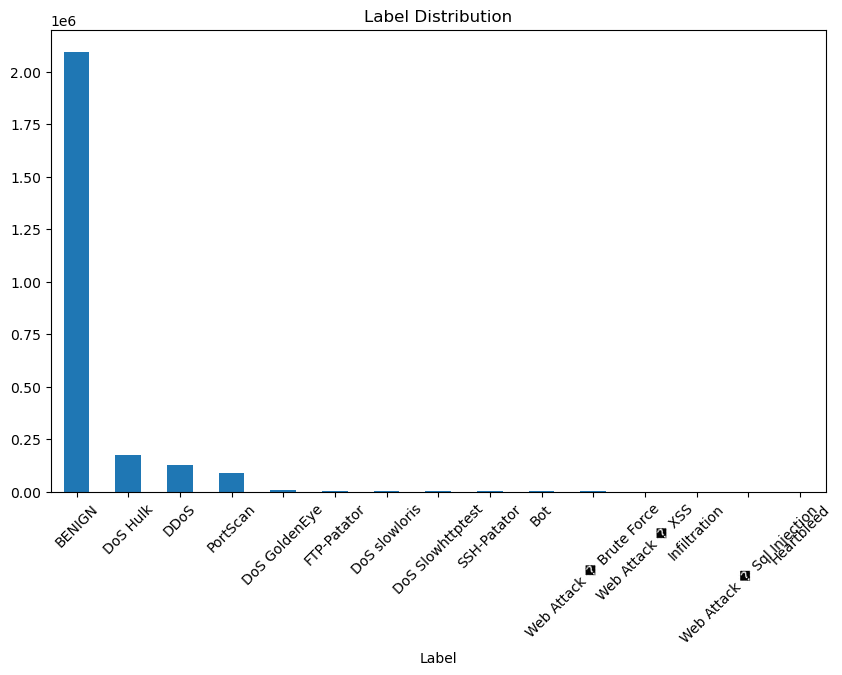

In [29]:
plt.figure(figsize=(10,6))
df["Label"].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xticks(rotation=45)
plt.show()

In [30]:

encodings = {} 

for col in df.columns:
    if df[col].dtype == "object":  # Check if column is string/object type
        encodings[col] = LabelEncoder()
        df[col] = encodings[col].fit_transform(df[col])

In [31]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [32]:
# Split into features and target
X = df.drop(columns=["Label"]).values
y = df["Label"].values


In [33]:
X[np.isinf(X)] = np.nan

In [34]:
from sklearn.impute import SimpleImputer

# Replace NaN with column means
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

In [35]:
# Initial split (train+temp vs test)
# First split: train + val vs test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: train vs val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Verify distributions
print(f"Final splits:")
print(f"- Training:   {len(X_train)} samples ({len(X_train)/len(X):.1%})")
print(f"- Validation: {len(X_val)} samples ({len(X_val)/len(X):.1%})")
print(f"- Test:       {len(X_test)} samples ({len(X_test)/len(X):.1%})")

Final splits:
- Training:   1513205 samples (60.0%)
- Validation: 504402 samples (20.0%)
- Test:       504402 samples (20.0%)


Random Forest

In [37]:
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_val:", np.isnan(X_val).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())

NaNs in X_train: 0
NaNs in X_val: 0
NaNs in X_test: 0


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all CPU cores
)


In [39]:
# Train on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [40]:
from sklearn.metrics import classification_report

y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=encodings["Label"].classes_))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=encodings["Label"].classes_))


Validation Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    419111
                       Bot       0.90      0.73      0.81       395
                      DDoS       1.00      1.00      1.00     25653
             DoS GoldenEye       1.00      1.00      1.00      2083
                  DoS Hulk       1.00      1.00      1.00     34702
          DoS Slowhttptest       0.99      0.99      0.99       995
             DoS slowloris       1.00      0.99      0.99      1096
               FTP-Patator       1.00      1.00      1.00      1214
                Heartbleed       1.00      1.00      1.00         1
              Infiltration       1.00      0.75      0.86         8
                  PortScan       0.99      0.99      0.99     18023
               SSH-Patator       1.00      0.99      1.00       651
  Web Attack � Brute Force       0.77      0.82      0.80       331
Web Attack � 

In [41]:
print("Train score is:", rf_model.score(X_train, y_train))
print("Test score is:", rf_model.score(X_test, y_test))

Train score is: 0.9998176056780146
Test score is: 0.9982533772665453


Isolation Forest

In [43]:
from sklearn.ensemble import IsolationForest
# Initialize the model
contamination_parameter = 1 - sum(
    y_train == encodings["Label"].transform(["BENIGN"]) [0]) / len(y_train)
iso_forest = IsolationForest(
    n_estimators=100, max_samples=256, contamination=contamination_parameter)

In [44]:
iso_forest.fit(X_train)

IsolationForest(contamination=0.16883700490019526, max_samples=256)

In [45]:
scores = iso_forest.decision_function(X_val)

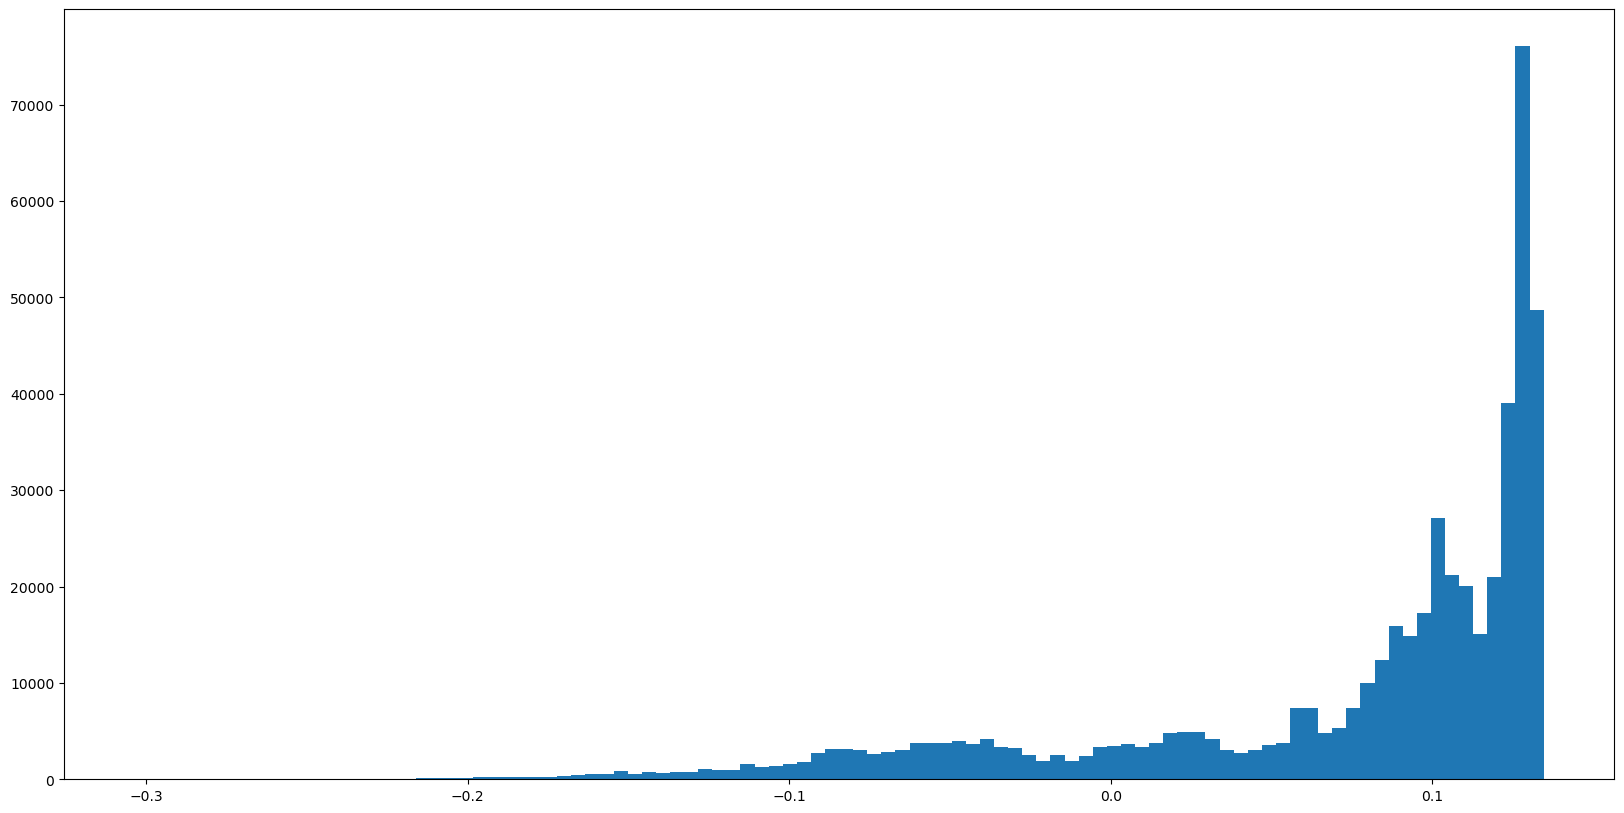

In [46]:
%matplotlib inline
plt.figure(figsize = (20, 10))
_ = plt.hist(scores, bins=100)

In [47]:
cutoff = -0.08

In [48]:
print(Counter(y_val))
print(Counter(y_val[cutoff>scores]))

Counter({0: 419111, 4: 34702, 2: 25653, 10: 18023, 3: 2083, 7: 1214, 6: 1096, 5: 995, 11: 651, 1: 395, 12: 331, 14: 133, 9: 8, 13: 6, 8: 1})
Counter({0: 16505, 4: 8573, 2: 2162, 6: 591, 5: 234, 3: 215, 10: 22, 12: 20, 1: 13, 9: 7, 14: 6, 8: 1})


In [49]:
scores_test = iso_forest.decision_function(X_test)
print(Counter(y_test))
print(Counter(y_test[cutoff>scores_test]))

Counter({0: 419303, 4: 34627, 2: 25494, 10: 18223, 3: 2028, 7: 1218, 6: 1077, 5: 1032, 11: 631, 1: 367, 12: 250, 14: 139, 13: 6, 9: 5, 8: 2})
Counter({0: 16384, 4: 8610, 2: 2176, 6: 586, 5: 228, 3: 192, 10: 23, 12: 11, 1: 5, 9: 5, 8: 2, 14: 1})


In [50]:
benign_label = encodings["Label"].transform(["BENIGN"])[0]
y_val_binary = (y_val != benign_label).astype(int)


In [51]:
from collections import Counter
print(Counter(y_val))

Counter({0: 419111, 4: 34702, 2: 25653, 10: 18023, 3: 2083, 7: 1214, 6: 1096, 5: 995, 11: 651, 1: 395, 12: 331, 14: 133, 9: 8, 13: 6, 8: 1})


In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

scores_flipped = -scores  

fpr, tpr, _ = roc_curve(y_val_binary, scores_flipped)
roc_auc = auc(fpr, tpr)


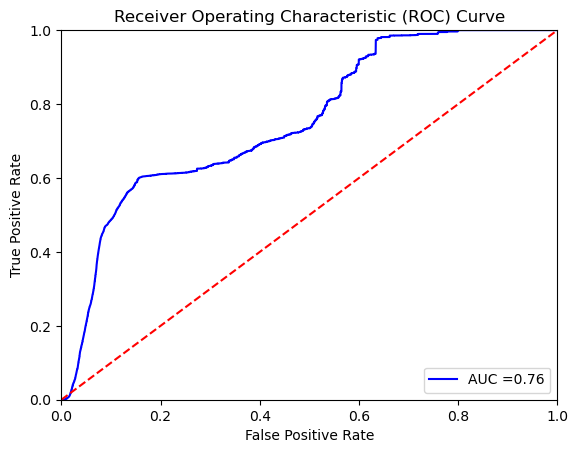

In [53]:
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b-', label='AUC =%0.2f' % roc_auc) 
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')  # Red dashed diagonal
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [54]:
# Choose a cutoff, e.g., the contamination percentile
import numpy as np

threshold = np.percentile(scores, 100 * contamination_parameter)
preds_val = (scores < threshold).astype(int)  # 1 = predicted anomaly

# Evaluate with classification report
from sklearn.metrics import classification_report
print(classification_report(y_val_binary, preds_val))




              precision    recall  f1-score   support

           0       0.90      0.90      0.90    419111
           1       0.49      0.49      0.49     85291

    accuracy                           0.83    504402
   macro avg       0.69      0.69      0.69    504402
weighted avg       0.83      0.83      0.83    504402



In [91]:
# Save model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [95]:
# Save model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

['isolation_forest_model.pkl']